In [1]:
#obspy
from obspy import UTCDateTime
from obspy.taup import TauPyModel
model = TauPyModel(model="iasp91")
#rtergpy (Andy's code)
from rtergpy.run import defaults, event, etime2name
from rtergpy.waveforms import getwaves, get_respinv
#attenuation (Hiba's code)
from AttenuationFunctions import processANSS, filtering, maxamp_calc, organize_data, maxamp_plot

In [32]:
# Processing and Reading information about event stored in ANSS_data.txt
Defaults = defaults()
Event = event()
Defaults.src='IRIS'
Defaults.network='II,IU,US,GS'
#Defaults.chan='??Z'
Defaults.chan= 'BHZ'
Defaults.stationrange=[0,10.0]
Event.ecount='00'
Event.iter='IRIS'
Event.newData = True   # False means use already downloaded data
edateold=""
ANSS = processANSS() 
for index, EQ in ANSS.iterrows(): #organizing data to use details
    # network = "AM"
    # chan = "EHZ"
    # src = "RASPISHAKE"
    rads = [1.,30.]
    eloc = [EQ.Latitude,EQ.Longitude,EQ.Depth] 
    MagType = [EQ.Mtype]
    MagValue = [EQ.Mag]
    Magnitude = [MagType, MagValue]
    year,mo,dy = EQ.Date.split('-')
    hh,mn,sec = EQ.Time.split(':')
    etime=(UTCDateTime(int(year),int(mo),int(dy),int(hh),int(mn),float(sec)))
    if EQ.Date == edateold:
        Event.ecount=str(int(Event.ecount)+1).zfill(2)
    else:
        Event.ecount='00'
    edateold=EQ.Date
    Event.eventname=etime2name(etime,ecount=Event.ecount)
    Event.origin=[eloc,etime]
    print("\n\n"+Event.eventname+" ===============================")
    try:
        st, df = [], []
        st, df = getwaves(Defaults,Event)
    except:
        print("ERROR: running on "+Event.eventname+" failed!!!!\n\n") 



2022012400 ===============================
ERROR:  coudn't move directory to  /Users/hkunwer/Documents/research/EQenergy/events/2022/2022012400/IRIS.bak
Error:  Couldn't create directory:  /Users/hkunwer/Documents/research/EQenergy/events/2022/2022012400/IRIS
Checking for stations available within range from IRIS
Getting waves from IRIS


  0%|                                                     | 0/4 [00:00<?, ?it/s]

10.0 18.4578 -73.3389 8.8839 -70.634


 25%|███████████▎                                 | 1/4 [00:01<00:03,  1.27s/it]

10.0 18.4578 -73.3389 8.8839 -70.634


 50%|██████████████████████▌                      | 2/4 [00:02<00:01,  1.00it/s]

10.0 18.4578 -73.3389 18.1091 -66.15


 75%|█████████████████████████████████▊           | 3/4 [00:03<00:00,  1.03it/s]

10.0 18.4578 -73.3389 18.1091 -66.15


100%|█████████████████████████████████████████████| 4/4 [00:04<00:00,  1.01s/it]

rPtime =  60.0
Trace SNR =  1726.5408625356772 1
Trace SNR =  0.8639439048558973 2
Trace SNR =  207.45708522372183 3
Trace SNR =  211.99066330098228 4
3  of  4 traces were kept above SNR threshold 10.0
writing  /Users/hkunwer/Documents/research/EQenergy/events/2022/2022012400/IRIS/pkls/Params_2022012400.pkl 
 /Users/hkunwer/Documents/research/EQenergy/events/2022/2022012400/IRIS/Params_2022012400.csv
writing  /Users/hkunwer/Documents/research/EQenergy/events/2022/2022012400/IRIS/pkls/Wavestream-raw_2022012400.pkl


In [33]:
eventID = (str(etime)+Event.iter+Event.ecount) # creates unique event name
#inventory = get_respinv(Defaults.network,eloc,etime,rads,Defaults.chan,Defaults.src)

In [34]:
stp = filtering(st) # filter stream for instrument response and taper

In [35]:
df_freq = maxamp_calc(stp, eventID) #calculate max amps and dist for each tr at freq bands

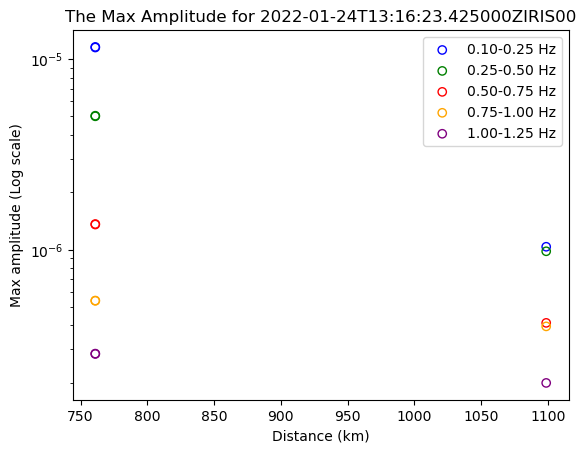

In [30]:
organize_data(df_freq, EQ, etime, eloc, eventID) #creates dataframe of all results
maxamp_plot(eventID,df_freq) #plots maxamps vs distance